<a href="https://colab.research.google.com/github/Kazuhiko-Miyata/wine_quality_check_randomforest_classifier/blob/main/%E3%83%A9%E3%83%B3%E3%83%80%E3%83%A0%E3%83%95%E3%82%A9%E3%83%AC%E3%82%B9%E3%83%88%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%9F%E3%83%AF%E3%82%A4%E3%83%B3%E5%93%81%E8%B3%AA%E5%88%A4%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ワインデータのダウンロード**






[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality)

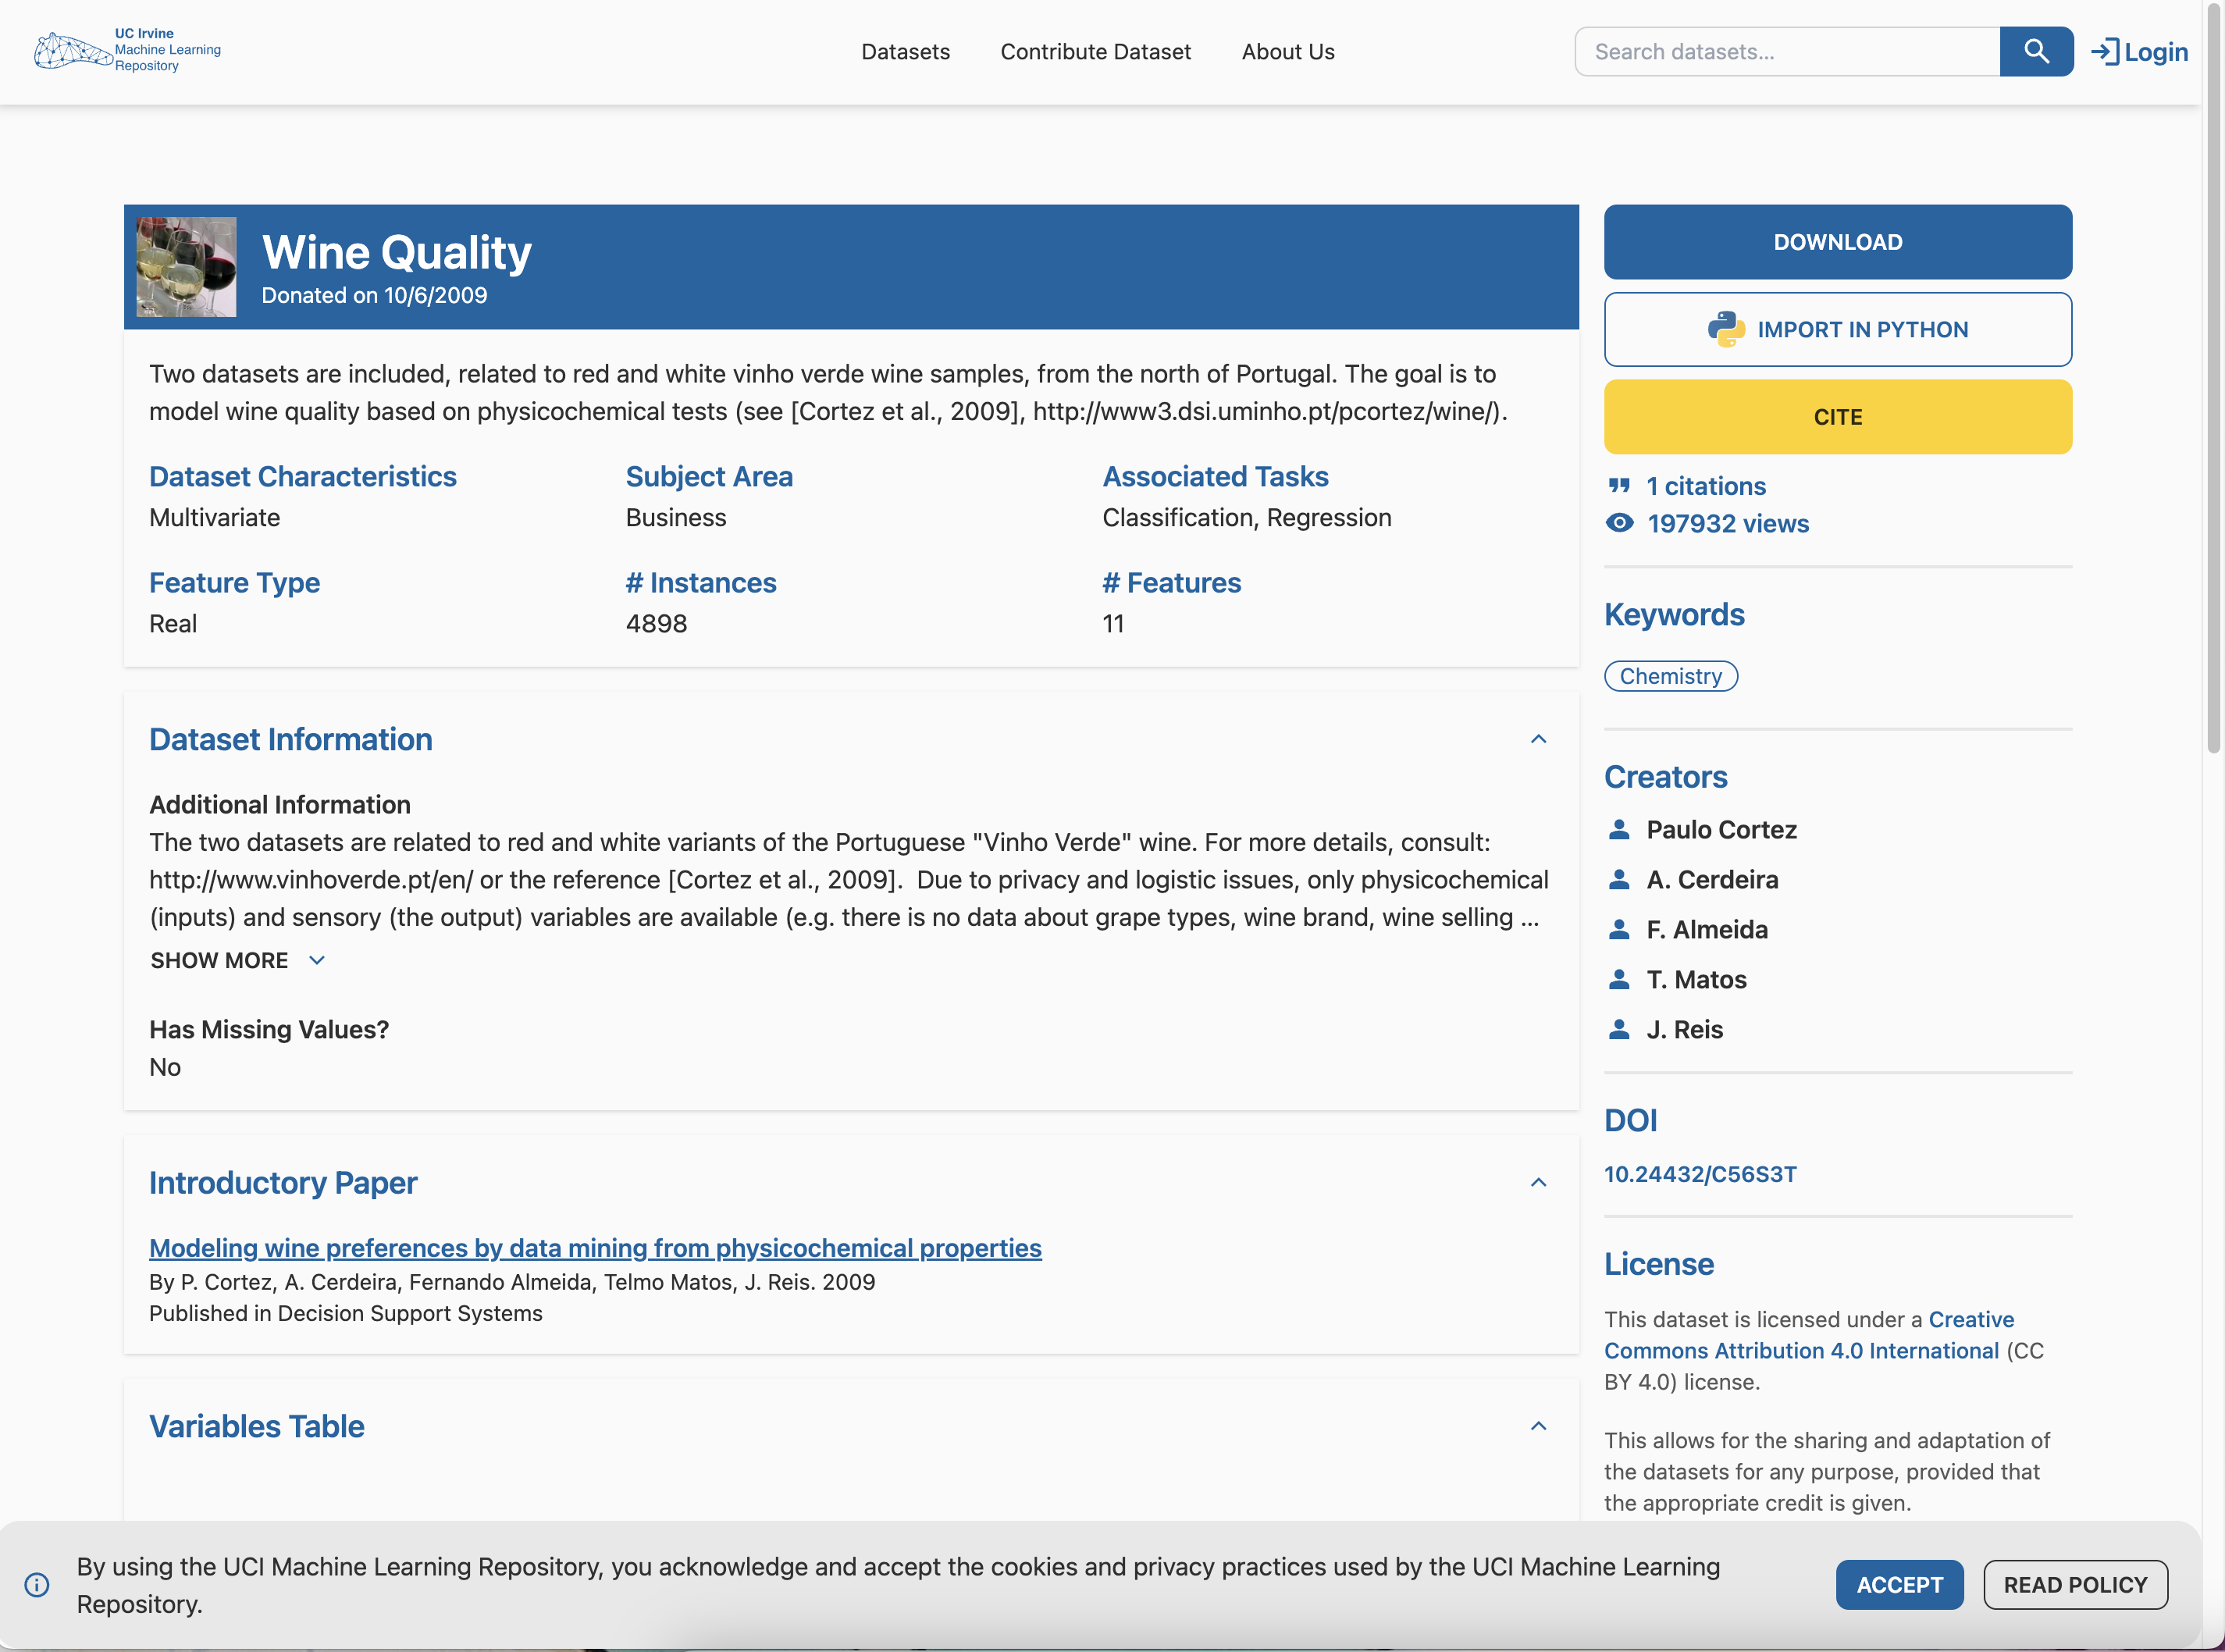

In [8]:
from urllib.request import urlretrieve
url = "https://archive.ics.uci.edu"+\
      "/ml/machine-learning-databases/wine-quality"+\
      "/winequality-white.csv"
savepath = "winequality-white.csv"
urlretrieve(url, savepath)

('winequality-white.csv', <http.client.HTTPMessage at 0x7c93f4138df0>)

In [9]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### **ワインデータの説明**
<br>1.  fixed acidity（酸性度）
<br>2.  volatile acidity（揮発性酸度）
<br>3.  citric acid(クエン酸)
<br>4.  residual sugar(残留糖)
<br>5.  chlorides(塩化物)
<br>6.  free sulfur dioxide(遊離二酸化硫黄)
<br>7.  total sulfur dioxide(総二酸化硫黄)
<br>8.  density(密度)
<br>9.  pH(ペーハー)
<br>10. sulphates(硫酸塩)
<br>11. alcohol(アルコール)
<br>12. quality(品質 0:悪い--10:良い)

### **ワイン品質を判定するプログラム**
今回はランダムフォレストを使用

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#データを読み込む
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

#データを目的変数とデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

#学習用とテスト用に分割
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

#学習
model = RandomForestClassifier()
model.fit(x_train, y_train)

#評価
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.75      0.18      0.29        34
           5       0.74      0.71      0.73       285
           6       0.66      0.82      0.73       432
           7       0.69      0.55      0.61       184
           8       0.81      0.41      0.55        41
           9       0.00      0.00      0.00         1

    accuracy                           0.69       980
   macro avg       0.52      0.38      0.41       980
weighted avg       0.70      0.69      0.68       980

正解率= 0.6928571428571428


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ワインの品質分類の制度を表す値。実行するたびに値は異なるが、だいたい
0.61～0.68までの値が表示される。データの実行結果が異なるのは、データを学習用とテスト用にランダムに分割するために、どのデータを学習したかによって多少の誤差が生じるから。
**<br><br>プログラムの確認**
<br>読み込んだワインのデータをラベル部分（目的変数）とデータ部分（説明変数）に分離する。ここでは、ワイン専門家による評価（quality）がラベルに相当し、11種類のワイン成分がデータに相当する。

## **精度向上を目指す**
しかしながら、0.67（67％）という数字の精度にはまだまだ向上の余地があるため、もう少しワインデータの精度向上を目指す。加えてclassification_report()の実行結果に「UnderfinedMetricWarning（未定義メトリックの警告）」が表示されている。これはすべてのラベルにデータが分類されていないことを表している。
<br>そこで今回のデータについて改めて確認してみる。このワインデータの説明を見てみると、11段階のワインがそれぞれ同数あるというわけでもない。
<br>各品質（quality）のデータがいくつずつあるのか調べてみる


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


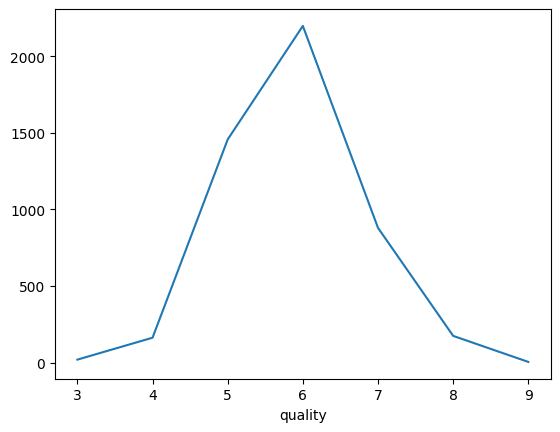

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

#ワインデータの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

#品質データごとにグループ分けして、その場を数える
count_data = wine.groupby("quality")["quality"].count()
print(count_data)

#数えたデータをグラフに描画
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()

In [12]:
#yのラベルをつけ直す
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist +=[2]
y = newlist

## **上記のコードを利用してプログラムの組み直し**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#データの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

#データを目的変数とデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

#ラベルをつけ直す
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

#学習用とテスト用に分割する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#学習する
model = RandomForestClassifier()
model.fit(x_train, y_train)

#評価する
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率=", accuracy_score(y_test, y_pred))

Writing winequality-white.py
